# Value Iteration

Idea behind Value Iteration is very similar to [Policy Iteration](https://github.com/ceteke/RL/blob/master/Tabular/Dynamic%20Programming/Policy%20Iteration.ipynb). We fuse both policy evaluation and update into one step.  

<center>
$v_{k+1}(s) = \underset{a}{\operatorname{max}}\sum\limits_{s'}p(s',r\mid s,a)[r+\gamma v_k(s')]$
</center>  

Taking the max among the possible actions eliminates the need for fusing policy evaluation. As a result of this value iteration, we end up with a deterministic policy.  

<center>
$\pi(s) = \underset{a}{\operatorname{argmax}}\sum\limits_{s'}p(s',r\mid s,a)[r+\gamma v_k(s')]$
</center>

For implementation I have updated the policy at each step where we take the max of new values.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from gym.envs.toy_text.frozen_lake import FrozenLakeEnv

In [13]:
def init(env):
    """
    env: OpenAI Gym Environment
    """
    values = np.zeros(env.nS)
    policy = np.zeros(env.nS) # This time policy is deterministic
    return values, policy

In [25]:
def value_iteration(env, discount=0.8, theta=0.00001):
    policy_stable = False
    values, policy = init(env)
    
    while True:
        delta = 0
        for s in range(env.nS): # For every state
            value = values[s]
            actions = []
            for a in range(env.nA): # For every action
                action_value = 0
                for transition, nextstate, reward, done in env.P[s][a]: # For every next state when action a is taken
                    action_value += transition * (reward + discount * values[nextstate]) # Bellman optimality equation
                actions.append(action_value)
            policy[s] = np.argmax(actions)
            new_value = max(actions)
            delta = max(delta, np.abs(value-new_value))
            values[s] = new_value
        if delta < theta:
            break
    policy = policy.astype(np.int8)
    return policy

In [26]:
env = FrozenLakeEnv()
policy = value_iteration(env)
done = False
state = env.reset()
env.render()
rewards = []
while not done:
    state, reward, done, _ = env.step(policy[state])
    rewards.append(reward)
    env.render()


SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG


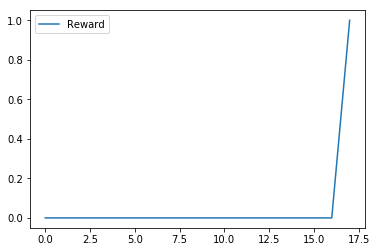

In [27]:
plt.plot(rewards, label="Reward")
plt.legend()